In [3]:
# Importing needed libraries:

import pandas as pd
import numpy as np

# visualizing
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('figure', figsize=(13, 10))
plt.rc('font', size=14)

# preparing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, explained_variance_score

# modeling and evaluating
from sklearn.linear_model import LinearRegression, LassoLars
from sklearn.linear_model import TweedieRegressor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import PolynomialFeatures

# importing stats for hypothesis testing:
from scipy import stats

# turn off warnings
import warnings
warnings.filterwarnings("ignore")

# Importing the os library to access the env (credit)
import os
import env

from env import host, user, password

In [4]:
import acquire
import prep
import wrangle

acquire.py functions loaded successfully
wrangle.py functions loaded successfully


In [ ]:
df = prep.prep_zillow_data()
df.shape

In [ ]:
df.info()

In [ ]:
df.describe()

#### Overall dataframe histogram

This histogram allows us to see which features in the current dataframe have the highest and lowest correlation. Overall, we will be looking for features that have the strongest positive and negative correlations, so long as they are not features that are derived from each other.

In [ ]:
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(500, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Splitting and Scaling

In [ ]:
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.train_validate_test(df)

In [ ]:
X_train_scaled, X_validate_scaled, X_test_scaled = wrangle.min_max_scale(X_train, X_validate, X_test)

In [ ]:
X_train_scaled.head()

In [ ]:
# Now on to explore:



plt.subplot(221)
X_train_scaled.bedroomcnt.hist()
plt.show()
plt.subplot(222)
X_train_scaled.bathroomcnt.hist()
plt.show()
plt.subplot(223)
X_train_scaled.calculatedfinishedsquarefeet.hist()
plt.show()
plt.subplot(224)
X_train_scaled.calculatedbathnbr.hist()
plt.show()

# Want to put these in a subplot group

In [ ]:
df_test = acquire.get_zillow_data()

In [ ]:
eval_df = df[['calculatedfinishedsquarefeet', 'bathroomcnt', 'bedroomcnt', 'calculatedbathnbr','taxvaluedollarcnt']]

In [ ]:
eval_df.shape

In [ ]:
eval_df.describe().round(1)

In [ ]:
# eval_df['calculatedfinishedsquarefeet'] = eval_df.calculatedfinishedsquarefeet[(np.abs(stats.zscore(eval_df.calculatedfinishedsquarefeet)) < 3)]

In [ ]:
# # Taking out the outliers:

# eval_df['calculatedfinishedsquarefeet'] = eval_df.calculatedfinishedsquarefeet[(np.abs(stats.zscore(eval_df.calculatedfinishedsquarefeet)) < 3)]
# eval_df = eval_df.dropna()

In [ ]:
df.describe().round(1)

In [ ]:
# Converting a continuous into a categorical:

eval_df['tax_range'] = pd.cut(df.taxvaluedollarcnt, bins = [25504, 210000, 360000, 572000, 600000], labels = ["Low", "Medium", "Med-High", "High"])

In [ ]:
eval_df.isna().sum()

In [ ]:
eval_df.tax_range.value_counts()

In [ ]:
# eval_df = eval_df.dropna

In [ ]:
sns.boxplot(data=eval_df, y='bedroomcnt', x='tax_range')

In [ ]:
# Now on to explore:

# figure, axes = plt.subplots(nrows = 2, ncols = 2)

# axes[0, 0].plot(x, y)

# axes[0, 1].X_train_scaled.bedroomcnt.hist()


# figure.tight_layout()

plt.subplot(221)
X_train_scaled.bedroomcnt.hist()
plt.show()
plt.subplot(222)
X_train_scaled.bathroomcnt.hist()
plt.show()
plt.subplot(223)
X_train_scaled.calculatedfinishedsquarefeet.hist()
plt.show()
plt.subplot(224)
X_train_scaled.calculatedbathnbr.hist()
plt.show()

# Want to put these in a subplot group

In [ ]:
# Boxplot of bedroom counts compared to tax valuation:

sns.boxplot(x = 'bedroomcnt', y = 'taxvaluedollarcnt', data = df)

In [ ]:
sns.boxplot(x = 'bedroomcnt', y = 'bathroomcnt', data = X_train)

In [ ]:
df.fips.value_counts()

In [ ]:
zillow_heatmap = df[['calculatedfinishedsquarefeet', 'bathroomcnt', 'bedroomcnt', 'calculatedbathnbr','taxvaluedollarcnt']]

corr = zillow_heatmap.corr()
corr

In [ ]:
cmap = sns.diverging_palette(15, 175, as_cmap = True)

sns.heatmap(corr, annot = True, cmap = cmap)
plt.show()

In [ ]:
def plot_categorical_and_continuous_vars(df, categorical_var, continuous_var):
    sns.barplot(data=df, y=continuous_var, x=categorical_var)
    plt.show()
    sns.violinplot(data=df, y=continuous_var, x=categorical_var)
    plt.show()
    sns.boxplot(data=df, y=continuous_var, x=categorical_var)

In [ ]:
plot_categorical_and_continuous_vars(X_train, 'bedroomcnt', 'tax')

# Exploring for Tax Values Report

In [1]:
# Getting the dataframe

In [5]:
tax_df_get = acquire.get_zillow_data()

In [6]:
tax_df_get.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,propertylandusetypeid,logerror,transactiondate
0,2463969,11393337,NaN,NaN,NaN,3.0,3.0,None,4.0,3.0,...,43439.0,2016.0,22755.0,756.94,Y,14.0,6.037235e+13,247,0.086137,2017-06-08
1,2061546,11289917,1.0,NaN,NaN,2.0,3.0,None,6.0,2.0,...,136104.0,2016.0,27214.0,2319.90,Y,15.0,6.037901e+13,261,-0.362001,2017-06-23
2,1834372,11705026,NaN,NaN,NaN,1.0,2.0,None,6.0,1.0,...,35606.0,2016.0,23624.0,543.69,None,NaN,6.037232e+13,261,-0.146056,2017-06-30
3,1923117,14269464,NaN,NaN,NaN,3.0,4.0,None,NaN,3.0,...,880456.0,2016.0,445569.0,9819.72,None,NaN,6.059064e+13,261,0.021085,2017-06-01
4,2121349,11389003,NaN,NaN,NaN,2.0,3.0,None,6.0,2.0,...,614000.0,2016.0,449000.0,7673.19,None,NaN,6.037703e+13,261,-0.325393,2017-06-01


In [7]:
tax_df_get.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21352 entries, 0 to 21351
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            21352 non-null  int64  
 1   parcelid                      21352 non-null  int64  
 2   airconditioningtypeid         6569 non-null   float64
 3   architecturalstyletypeid      49 non-null     float64
 4   basementsqft                  12 non-null     float64
 5   bathroomcnt                   21352 non-null  float64
 6   bedroomcnt                    21352 non-null  float64
 7   buildingclasstypeid           0 non-null      object 
 8   buildingqualitytypeid         13363 non-null  float64
 9   calculatedbathnbr             21180 non-null  float64
 10  decktypeid                    179 non-null    float64
 11  finishedfloor1squarefeet      1765 non-null   float64
 12  calculatedfinishedsquarefeet  21297 non-null  float64
 13  f

In [8]:
tax_df = tax_df_get[['id','parcelid', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 
                     'taxamount', 'fips', 'latitude', 'longitude', 'regionidcity', 
                     'regionidcounty', 'regionidneighborhood', 'regionidzip', 'taxdelinquencyflag', 'taxdelinquencyyear']]

In [9]:
tax_df.head()

,id,parcelid,calculatedfinishedsquarefeet,taxvaluedollarcnt,taxamount,fips,latitude,longitude,regionidcity,regionidcounty,regionidneighborhood,regionidzip,taxdelinquencyflag,taxdelinquencyyear
0,2463969,11393337,1534.0,43439.0,756.94,6037.0,33981374.0,-118317057.0,12447.0,3101.0,118208.0,96028.0,Y,14.0
1,2061546,11289917,1458.0,136104.0,2319.90,6037.0,34686163.0,-118113100.0,5534.0,3101.0,NaN,97318.0,Y,15.0
2,1834372,11705026,1421.0,35606.0,543.69,6037.0,33999877.0,-118291863.0,12447.0,3101.0,118208.0,96018.0,None,NaN
3,1923117,14269464,2541.0,880456.0,9819.72,6059.0,33694636.0,-117912245.0,38032.0,1286.0,NaN,96958.0,None,NaN
4,2121349,11389003,1650.0,614000.0,7673.19,6037.0,33985377.0,-118361620.0,396550.0,3101.0,NaN,96037.0,None,NaN


In [10]:
# Creating the tax rate column
tax_df['tax_rate'] = (tax_df.taxamount / tax_df.taxvaluedollarcnt) * 100
tax_df.head()

,id,parcelid,calculatedfinishedsquarefeet,taxvaluedollarcnt,taxamount,fips,latitude,longitude,regionidcity,regionidcounty,regionidneighborhood,regionidzip,taxdelinquencyflag,taxdelinquencyyear,tax_rate
0,2463969,11393337,1534.0,43439.0,756.94,6037.0,33981374.0,-118317057.0,12447.0,3101.0,118208.0,96028.0,Y,14.0,1.742536
1,2061546,11289917,1458.0,136104.0,2319.90,6037.0,34686163.0,-118113100.0,5534.0,3101.0,NaN,97318.0,Y,15.0,1.704505
2,1834372,11705026,1421.0,35606.0,543.69,6037.0,33999877.0,-118291863.0,12447.0,3101.0,118208.0,96018.0,None,NaN,1.526962
3,1923117,14269464,2541.0,880456.0,9819.72,6059.0,33694636.0,-117912245.0,38032.0,1286.0,NaN,96958.0,None,NaN,1.115299
4,2121349,11389003,1650.0,614000.0,7673.19,6037.0,33985377.0,-118361620.0,396550.0,3101.0,NaN,96037.0,None,NaN,1.249705


### Fixing the Latitude and Longitude numbers.

In [11]:
# Run this cell to move the decimal point over for the latitude and longitude numbers. Otherwise, those columns are useless.

tax_df['lat_cor'] = tax_df.latitude / 1000000
tax_df['long_cor'] = tax_df.longitude / 1000000
tax_df.head()

,id,parcelid,calculatedfinishedsquarefeet,taxvaluedollarcnt,taxamount,fips,latitude,longitude,regionidcity,regionidcounty,regionidneighborhood,regionidzip,taxdelinquencyflag,taxdelinquencyyear,tax_rate,lat_cor,long_cor
0,2463969,11393337,1534.0,43439.0,756.94,6037.0,33981374.0,-118317057.0,12447.0,3101.0,118208.0,96028.0,Y,14.0,1.742536,33.981374,-118.317057
1,2061546,11289917,1458.0,136104.0,2319.90,6037.0,34686163.0,-118113100.0,5534.0,3101.0,NaN,97318.0,Y,15.0,1.704505,34.686163,-118.113100
2,1834372,11705026,1421.0,35606.0,543.69,6037.0,33999877.0,-118291863.0,12447.0,3101.0,118208.0,96018.0,None,NaN,1.526962,33.999877,-118.291863
3,1923117,14269464,2541.0,880456.0,9819.72,6059.0,33694636.0,-117912245.0,38032.0,1286.0,NaN,96958.0,None,NaN,1.115299,33.694636,-117.912245
4,2121349,11389003,1650.0,614000.0,7673.19,6037.0,33985377.0,-118361620.0,396550.0,3101.0,NaN,96037.0,None,NaN,1.249705,33.985377,-118.361620


Discovered that there were some big outliers in the data for tax amount and tax rate (which is derived from tax amount / property tax value). The takeaway from that analysis was that those homes with tax deliquencies sometimes paid a large tax bill in a given year, causing that tax rate to shoot way up, when it otherwise wouldn't have.

In [12]:
tax_df['is_delinqent'] = tax_df.taxdelinquencyflag == "Y"
tax_df.head()

,id,parcelid,calculatedfinishedsquarefeet,taxvaluedollarcnt,taxamount,fips,latitude,longitude,regionidcity,regionidcounty,regionidneighborhood,regionidzip,taxdelinquencyflag,taxdelinquencyyear,tax_rate,lat_cor,long_cor,is_delinqent
0,2463969,11393337,1534.0,43439.0,756.94,6037.0,33981374.0,-118317057.0,12447.0,3101.0,118208.0,96028.0,Y,14.0,1.742536,33.981374,-118.317057,True
1,2061546,11289917,1458.0,136104.0,2319.90,6037.0,34686163.0,-118113100.0,5534.0,3101.0,NaN,97318.0,Y,15.0,1.704505,34.686163,-118.113100,True
2,1834372,11705026,1421.0,35606.0,543.69,6037.0,33999877.0,-118291863.0,12447.0,3101.0,118208.0,96018.0,None,NaN,1.526962,33.999877,-118.291863,False
3,1923117,14269464,2541.0,880456.0,9819.72,6059.0,33694636.0,-117912245.0,38032.0,1286.0,NaN,96958.0,None,NaN,1.115299,33.694636,-117.912245,False
4,2121349,11389003,1650.0,614000.0,7673.19,6037.0,33985377.0,-118361620.0,396550.0,3101.0,NaN,96037.0,None,NaN,1.249705,33.985377,-118.361620,False


In [15]:
tax_df.tax_rate.max()

45.28836480971813

We then tried to determine if the outliers on the tax rates were actually delinqent by using a scatter plot. It turns out that those payments were not coded as delinqent, whether by 

<AxesSubplot:xlabel='tax_rate', ylabel='taxvaluedollarcnt'>

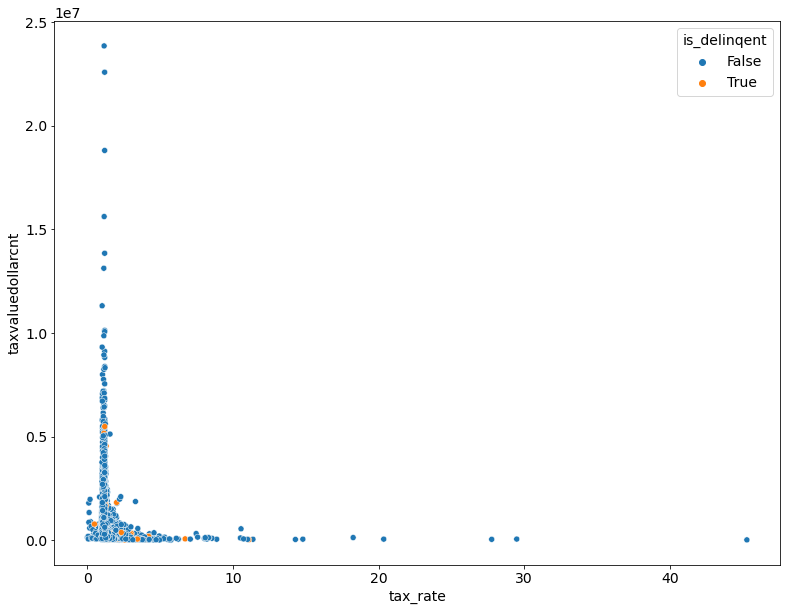

In [16]:
sns.scatterplot(x = "tax_rate", y = "taxvaluedollarcnt", data = tax_df, hue = 'is_delinqent')

In [17]:
# tax_df['tax_rate_scaled'] = tax_df[~(tax_df['tax_rate'] > 10)].round(1)
tax_df.head()

,id,parcelid,calculatedfinishedsquarefeet,taxvaluedollarcnt,taxamount,fips,latitude,longitude,regionidcity,regionidcounty,regionidneighborhood,regionidzip,taxdelinquencyflag,taxdelinquencyyear,tax_rate,lat_cor,long_cor,is_delinqent
0,2463969,11393337,1534.0,43439.0,756.94,6037.0,33981374.0,-118317057.0,12447.0,3101.0,118208.0,96028.0,Y,14.0,1.742536,33.981374,-118.317057,True
1,2061546,11289917,1458.0,136104.0,2319.90,6037.0,34686163.0,-118113100.0,5534.0,3101.0,NaN,97318.0,Y,15.0,1.704505,34.686163,-118.113100,True
2,1834372,11705026,1421.0,35606.0,543.69,6037.0,33999877.0,-118291863.0,12447.0,3101.0,118208.0,96018.0,None,NaN,1.526962,33.999877,-118.291863,False
3,1923117,14269464,2541.0,880456.0,9819.72,6059.0,33694636.0,-117912245.0,38032.0,1286.0,NaN,96958.0,None,NaN,1.115299,33.694636,-117.912245,False
4,2121349,11389003,1650.0,614000.0,7673.19,6037.0,33985377.0,-118361620.0,396550.0,3101.0,NaN,96037.0,None,NaN,1.249705,33.985377,-118.361620,False


# Trying this method to remove tax_rate outliers

In [24]:
tax_df = tax_df[tax_df.tax_rate < 4]
tax_df = tax_df[tax_df.taxvaluedollarcnt < ]

In [30]:
tax_df.describe().round(1)

,id,parcelid,calculatedfinishedsquarefeet,taxvaluedollarcnt,taxamount,fips,latitude,longitude,regionidcity,regionidcounty,regionidneighborhood,regionidzip,taxdelinquencyyear,tax_rate,lat_cor,long_cor
count,21293.0,21293.0,21238.0,21293.0,21293.0,21293.0,21293.0,21293.0,20927.0,21293.0,8536.0,21279.0,721.0,21293.0,21293.0,21293.0
mean,1511196.2,13051541.9,1800.7,504195.6,6134.2,6049.4,34004123.5,-118201818.7,33378.2,2508.8,187692.4,96605.6,14.1,1.3,34.0,-118.2
std,859048.3,3446502.8,945.4,651095.7,7542.2,21.1,267204.7,361869.8,46395.6,809.6,163382.2,4176.6,1.5,0.3,0.3,0.4
min,349.0,10712101.0,242.0,11089.0,19.9,6037.0,33340851.0,-119388346.0,3491.0,1286.0,6952.0,95982.0,8.0,0.0,33.3,-119.4
25%,775211.0,11564729.0,1188.0,211974.0,2739.0,6037.0,33806758.0,-118414412.0,12447.0,1286.0,41466.0,96193.0,14.0,1.2,33.8,-118.4
50%,1527119.0,12547390.0,1556.0,366056.0,4520.6,6037.0,34019051.0,-118178000.0,25218.0,3101.0,118872.0,96395.0,15.0,1.2,34.0,-118.2
75%,2252567.0,14249294.0,2139.0,589100.0,7133.7,6059.0,34175531.0,-117922962.0,45457.0,3101.0,274765.0,96987.0,15.0,1.3,34.2,-117.9
max,2982274.0,167687839.0,15450.0,23858374.0,276797.8,6111.0,34779658.0,-117555373.0,396556.0,3101.0,764166.0,399675.0,15.0,4.0,34.8,-117.6


In [32]:
(tax_df.taxvaluedollarcnt > 589100.0).sum()

5323

In [25]:
tax_df.shape

(21293, 18)

In [26]:
# taxamt_reduced = (tax_df.taxvaluedollarcnt / 1000)

<AxesSubplot:xlabel='tax_rate', ylabel='taxvaluedollarcnt'>

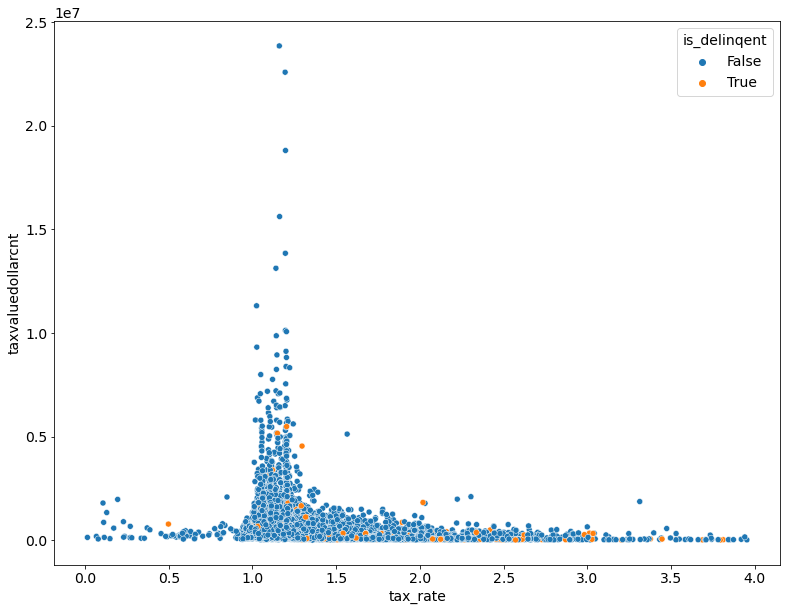

In [27]:
sns.scatterplot(x = "tax_rate", y = "taxvaluedollarcnt", data = tax_df, hue = 'is_delinqent')

In [ ]:
tax_df.head()

In [ ]:
tax_df.tax_rate.max()

In [ ]:
tax_df.tax_rate.median()

In [ ]:
sns.scatterplot(data = tax_df, y = 'tax_rate', x = 'fips')
# plt.xlim(0, 5)

In [ ]:
tax_df.tax_rate.mean()

In [ ]:
tax_df.tax_rate.median()

In [ ]:
tax_df.regionidzip.value_counts().count()

In [ ]:
tax_df.shape

In [ ]:
# Run this cell to save the dataframe to a .csv

tax_df.to_csv('tax_data_report.csv')